<a href="https://colab.research.google.com/github/sFranchetto/IntroToLinearRegression/blob/main/Linear_Regression_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import tensorflow as tf

In [2]:
dataset_columns = ["Years of Experience", "Salary"]

In [7]:
df = pd.read_csv("Salary.csv")
df.columns = dataset_columns
df

,Years of Experience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


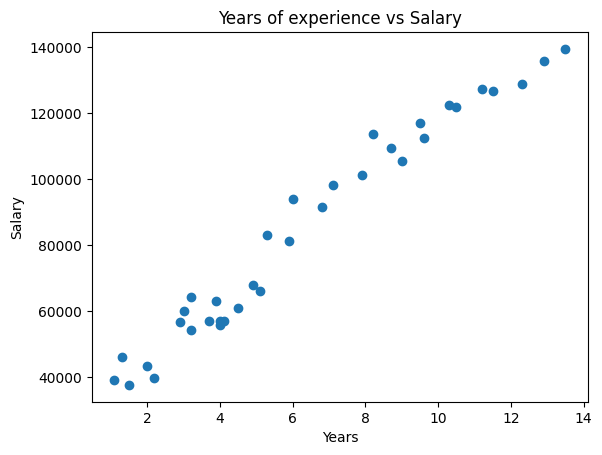

In [9]:
plt.scatter(df["Years of Experience"], df["Salary"])
plt.title("Years of experience vs Salary")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

## Split our Train/Test set

In [13]:
train, test = np.split(df.sample(frac=1), [int(0.9*len(df))])

In [20]:
X_train_values = train["Years of Experience"].to_numpy()
y_train_values = train["Salary"].to_numpy()

X_train_values = X_train_values.reshape(-1,1)
y_train_values= y_train_values.reshape(-1,1)

In [23]:
X_test_values = test["Years of Experience"].to_numpy()
y_test_values = test["Salary"].to_numpy()

X_test_values = X_test_values.reshape(-1,1)
y_test_values= y_test_values.reshape(-1,1)

In [21]:
years_to_salary = LinearRegression()
years_to_salary.fit(X_train_values, y_train_values)

LinearRegression()

In [24]:
years_to_salary.score(X_test_values, y_test_values)

0.8733551344434033

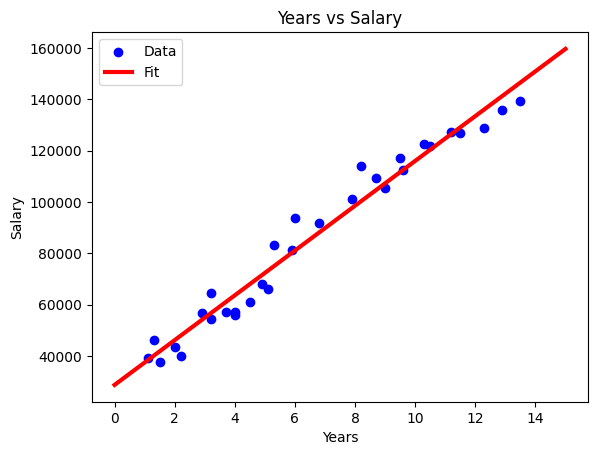

In [35]:
plt.scatter(X_train_values, y_train_values, label="Data", color="blue")
x = tf.linspace(0,15,15)
plt.plot(x, years_to_salary.predict(np.array(x).reshape(-1,1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Years vs Salary")
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()